In [1]:
# data => banknotes.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv("banknotes.csv")
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.shape

(1372, 5)

In [9]:
df.isnull().sum().sum()

0

In [11]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [13]:
# separate input and output
x = df.drop('Class', axis = 1)
y = df['Class']

In [15]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


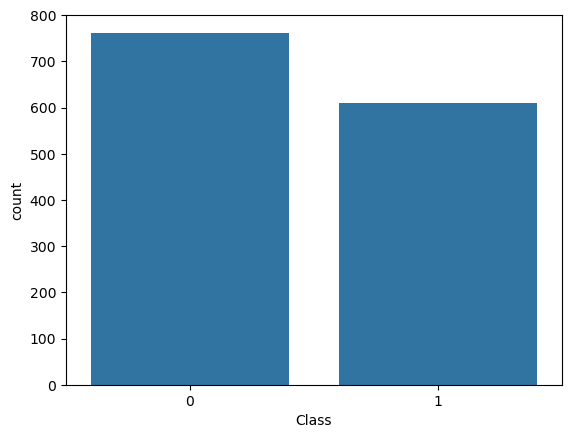

In [17]:
sns.countplot(x = y);z

In [19]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [21]:
# cross validation

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42,
                                                   test_size= 0.25)

In [25]:
x_train.shape, y_train.shape

((1029, 4), (1029,))

In [27]:
x_test.shape, y_test.shape

((343, 4), (343,))

In [29]:
# model building

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier(random_state= 42, max_depth= 10, min_samples_split= 2)

In [41]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [43]:
# Evaluate

In [45]:
y_pred = dt.predict(x_test)

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

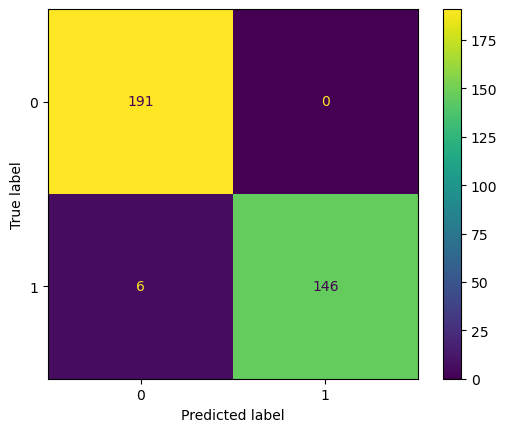

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [51]:
print(classification_report(y_test, y_pred));

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       191
           1       1.00      0.96      0.98       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [53]:
accuracy_score(y_test, y_pred)

0.9825072886297376

In [55]:
# plot the tree

In [57]:
from sklearn.tree import plot_tree

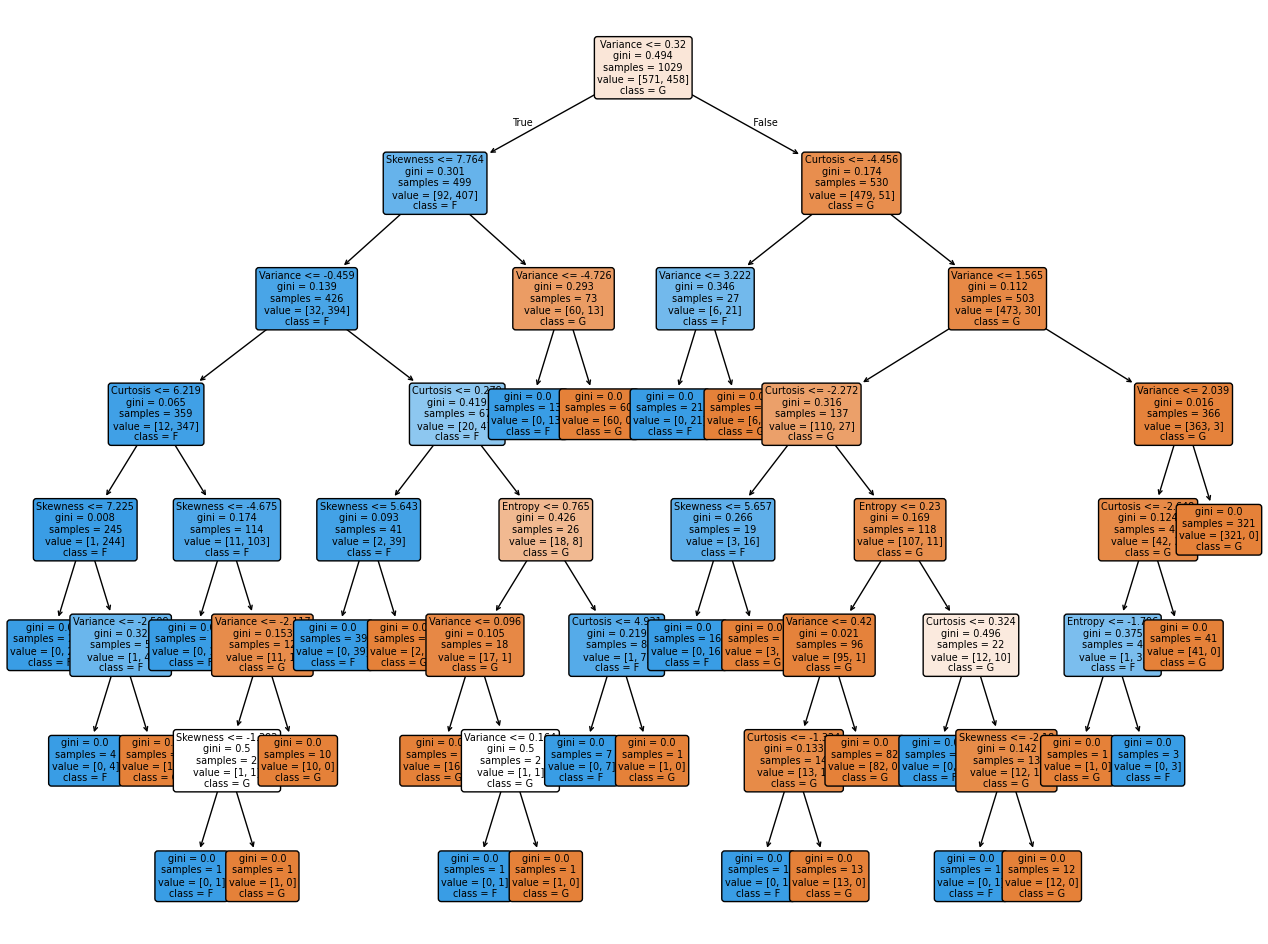

In [61]:
plt.figure(figsize=(16, 12))

plot_tree(dt, rounded = True, fontsize= 7, filled= True,class_names= ["G", "F"], 
         feature_names= x.columns);

In [63]:
# feature importance

In [65]:
dt.feature_importances_

array([0.62282802, 0.19605362, 0.1496427 , 0.03147565])

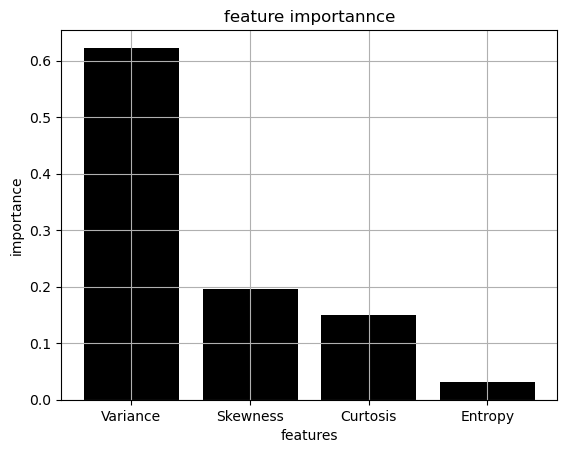

In [67]:
plt.title("feature importannce")
plt.xlabel("features")
plt.ylabel("importance")

plt.bar(x.columns, dt.feature_importances_, color = "black")
plt.grid();

In [69]:
# 5.5	7.40	-1.86	-0.41

In [71]:
dt.predict([[5.5, 7.40, -1.86, -0.41]])

C:\Program Files\Orange\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)